## Sydney and Melbourne Top Venues and their Comparison

#### Importing Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import requests
import csv
import json
from pandas.io.json import json_normalize
from geopy.geocoders import Nominatim 
from geopy.exc import GeocoderTimedOut
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans
import folium
import matplotlib.pyplot as plt
import seaborn as sns
print('Libraries imported.')

Libraries imported.


## Loading the required Data

The suburb information of Sydney and Melbourne beed to be read 

In [2]:
melbourne_suburbs = pd.read_csv('melbourne_suburbs.csv')
melbourne_suburbs=melbourne_suburbs.fillna(0)
melbourne_suburbs.reset_index(inplace=True)
melbourne_suburbs.drop(['index'],inplace=True,axis=1)
melbourne_suburbs

,Suburb,Latitude,Longitude
0,"Abbotsford, Victoria",-37.800278,145.000000
1,"Aberfeldie, Victoria",-37.751111,144.900000
2,"Aintree, Victoria",-37.716667,144.666667
3,"Airport West, Victoria",-37.717222,144.867778
4,"Albanvale, Victoria",-37.734444,144.751389
...,...,...,...
381,"Windsor, Victoria",-37.850278,144.983611
382,"Wollert, Victoria",-37.584444,145.018056
383,Wyndham Vale,-37.883889,144.617778
384,"Yallambie, Victoria",-37.717500,145.100278


In [3]:
sydney_suburbs = pd.read_csv('sydney_suburbs.csv')
sydney_suburbs.dropna(inplace=True)
sydney_suburbs.reset_index(inplace=True)
sydney_suburbs.drop(['index'],inplace=True,axis=1)
sydney_suburbs

,Suburb,Latitude,Longitude
0,Abbotsbury,-33.869285,150.866703
1,Abbotsford,-33.850553,151.129759
2,Acacia Gardens,-33.732459,150.912532
3,Agnes Banks,-33.614508,150.711448
4,Airds,-34.090000,150.826111
...,...,...,...
673,Yennora,-33.862008,150.968610
674,Yowie Bay,-34.050278,151.103333
675,Zetland,-33.907662,151.208218
676,Jordan Springs,-33.725022,150.727127


<h1>Finding Nearest Suburb</h1>

The nearest suburb is determined by euclidean distance between them.

### Melbourne

In [4]:
from geopy.distance import great_circle
a=len(melbourne_suburbs)
nearest_station=[None] * a
distance= [None] * a

for i in range(a):
    if (melbourne_suburbs['Latitude'][i]!=0):
        suburb_coor=(melbourne_suburbs['Latitude'][i],melbourne_suburbs['Longitude'][i])
        dist=float('inf')
        for j in range(len(melbourne_suburbs)):
            if(melbourne_suburbs['Latitude'][i]!=melbourne_suburbs['Latitude'][j]):
                station_coor=(melbourne_suburbs['Latitude'][j],melbourne_suburbs['Longitude'][j])
                temp=great_circle(suburb_coor,station_coor).km
                if(temp<dist):
                    dist = temp
                    distance[i] = temp
                    nearest_station[i]=melbourne_suburbs['Suburb'][j]
    else:
        nearest_station[i]=np.nan
        distance[i]=np.nan
        
melbourne_suburbs_closest=pd.DataFrame(melbourne_suburbs[['Suburb','Latitude','Longitude']])
melbourne_suburbs_closest.insert(1,'Nearest Suburb ',nearest_station)
melbourne_suburbs_closest.insert(2,'Distance(km)',distance)
melbourne_suburbs_closest.dropna(inplace=True)
melbourne_suburbs_closest.reset_index(drop=True, inplace=True)
melbourne_suburbs_closest

,Suburb,Nearest Train Station,Distance(km),Latitude,Longitude
0,"Abbotsford, Victoria","Collingwood, Victoria",1.440279,-37.800278,145.000000
1,"Aberfeldie, Victoria","Moonee Ponds, Victoria",1.490060,-37.751111,144.900000
2,"Aintree, Victoria","Deanside, Victoria",2.984851,-37.716667,144.666667
3,"Airport West, Victoria","Keilor Park, Victoria",1.564956,-37.717222,144.867778
4,"Albanvale, Victoria","Kings Park, Victoria",1.373518,-37.734444,144.751389
...,...,...,...,...,...
376,"Windsor, Victoria","Prahran, Victoria",0.102329,-37.850278,144.983611
377,"Wollert, Victoria","Epping, Victoria",5.673678,-37.584444,145.018056
378,Wyndham Vale,"Werribee, Victoria",3.450879,-37.883889,144.617778
379,"Yallambie, Victoria","Viewbank, Victoria",0.066433,-37.717500,145.100278


### Sydney

In [5]:
from geopy.distance import great_circle
a=len(sydney_suburbs)
nearest_station=[None] * a
distance= [None] * a

for i in range(a):
    if (sydney_suburbs['Latitude'][i]!=0):
        suburb_coor=(sydney_suburbs['Latitude'][i],sydney_suburbs['Longitude'][i])
        dist=float('inf')
        for j in range(len(sydney_suburbs)):
            if(sydney_suburbs['Latitude'][i]!=sydney_suburbs['Latitude'][j]):
                station_coor=(sydney_suburbs['Latitude'][j],sydney_suburbs['Longitude'][j])
                temp=great_circle(suburb_coor,station_coor).km
                if(temp<dist):
                    dist = temp
                    distance[i] = temp
                    nearest_station[i]=sydney_suburbs['Suburb'][j]
    else:
        nearest_station[i]=np.nan
        distance[i]=np.nan
        
Sydney_suburbs_closest=pd.DataFrame(sydney_suburbs[['Suburb','Latitude','Longitude']])
Sydney_suburbs_closest.insert(1,'Nearest Suburb',nearest_station)
Sydney_suburbs_closest.insert(2,'Distance(km)',distance)
Sydney_suburbs_closest.dropna(inplace=True)
Sydney_suburbs_closest.reset_index(drop=True, inplace=True)
Sydney_suburbs_closest

,Suburb,Nearest Train Station,Distance(km),Latitude,Longitude
0,Abbotsbury,Edensor Park,1.508205,-33.869285,150.866703
1,Abbotsford,Chiswick,0.754029,-33.850553,151.129759
2,Acacia Gardens,Parklea,0.893057,-33.732459,150.912532
3,Agnes Banks,Hobartville,3.171556,-33.614508,150.711448
4,Airds,Bradbury,1.203151,-34.090000,150.826111
...,...,...,...,...,...
673,Yennora,Fairfield East,1.452823,-33.862008,150.968610
674,Yowie Bay,Gymea Bay,0.618253,-34.050278,151.103333
675,Zetland,Waterloo,0.825530,-33.907662,151.208218
676,Jordan Springs,Cambridge Gardens,1.545068,-33.725022,150.727127


<h1>FourSquare Data</h1>

In [6]:
CLIENT_ID = '2QRJVTMDUQQSSJLT5UJQ0FM1N4FH4HIWXIMEKHHJL324YORB' # your Foursquare ID
CLIENT_SECRET = 'TWXGRV4B0LLIPUYXXUVUK0DJC0NTTURW2F5KYTSFNMIKISYC' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 500
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 2QRJVTMDUQQSSJLT5UJQ0FM1N4FH4HIWXIMEKHHJL324YORB
CLIENT_SECRET:TWXGRV4B0LLIPUYXXUVUK0DJC0NTTURW2F5KYTSFNMIKISYC


In [7]:
# CLIENT_ID = 'MW0HNMAAVZ2AHN2GJQVRURBGN5HEORAR0EVEYMKI10WYYNNM'
# CLIENT_SECRET = 'DQ1ZEWFMCBKBC0311AJQE1T3HNSTQRP1RDVWOFZCVYLS20DB'
# VERSION = '20180604'
# LIMIT = 500

<h4>Inorder to fetch the venue details, we need the name, location and latitude of the place, radius. 
    
<li> I am limiting the number of venues to fetch to 500 </li>
<li> Also, the raduis is determined from half of the distance to the nearest          subrub, inoder to avoid the duplication of the venues </li>
</h4>

In [8]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    venues_list=[]
    for name, lat, lng,radius in zip(names, latitudes, longitudes,radius):
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items'] 
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Suburb', 
                  'Suburb Latitude', 
                  'Suburb Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    return(nearby_venues)

## Melbourne

In [9]:
melbourne_venues = getNearbyVenues(names=melbourne_suburbs_closest['Suburb'],
                                   latitudes=melbourne_suburbs_closest['Latitude'],
                                   longitudes=melbourne_suburbs_closest['Longitude'],
                                   radius=melbourne_suburbs_closest['Distance(km)']*1000/2
                                  )

In [115]:
print(melbourne_venues.shape)
melbourne_venues.to_csv(r'melbourne_venues.csv', index = True)
melbourne_venues.head()
print("Venues in Melbourne:")
melbourne_venues

(4079, 7)
venues in Melbourne:


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,"Abbotsford, Victoria",-37.800278,145.000000,Lentil As Anything,-37.802724,145.003507,Vegetarian / Vegan Restaurant
1,"Abbotsford, Victoria",-37.800278,145.000000,Abbotsford Convent,-37.802574,145.004410,Cultural Center
2,"Abbotsford, Victoria",-37.800278,145.000000,Retreat Hotel,-37.801126,144.997548,Pub
3,"Abbotsford, Victoria",-37.800278,145.000000,Slow Food Market,-37.802481,145.003597,Farmers Market
4,"Abbotsford, Victoria",-37.800278,145.000000,The Farm Cafe,-37.802940,145.005706,Café
...,...,...,...,...,...,...,...
4074,Wyndham Vale,-37.883889,144.617778,Aldi,-37.887292,144.607565,Department Store
4075,Wyndham Vale,-37.883889,144.617778,Presidents Park Softball Grounds,-37.882215,144.633154,Baseball Field
4076,Wyndham Vale,-37.883889,144.617778,Beautiful Cooking,-37.891832,144.630117,Asian Restaurant
4077,Wyndham Vale,-37.883889,144.617778,Wyndham Vale Station,-37.872706,144.608604,Train Station


In [114]:
print('There are {} uniques venues.'.format(len(melbourne_venues['Venue'].unique())))
print('There are {} uniques categories.'.format(len(melbourne_venues['Venue Category'].unique())))

There are 3122 uniques venues.
There are 313 uniques categories.


## Sydney

In [13]:
CLIENT_ID = 'MW0HNMAAVZ2AHN2GJQVRURBGN5HEORAR0EVEYMKI10WYYNNM'
CLIENT_SECRET = 'DQ1ZEWFMCBKBC0311AJQE1T3HNSTQRP1RDVWOFZCVYLS20DB'
VERSION = '20180604'
LIMIT = 500

In [14]:
sydney_venues = getNearbyVenues(names=sydney_suburbs['Suburb'], 
                                  latitudes=sydney_suburbs['Latitude'], 
                                  longitudes=sydney_suburbs['Longitude'], 
                                  radius=Sydney_suburbs_closest['Distance(km)']*1000/2)

In [116]:
print(sydney_venues.shape)
sydney_venues.to_csv(r'sydney_venues.csv', index = True)
sydney_venues.head()
print("Venues in Sydney:")
sydney_venues

(6506, 7)
Venues in Sydney:


,Suburb,Suburb Latitude,Suburb Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Abbotsbury,-33.869285,150.866703,Calmsley Hill City Farm,-33.868848,150.858808,Farm
1,Abbotsbury,-33.869285,150.866703,Abbotsbury Shops,-33.869554,150.865294,Convenience Store
2,Abbotsbury,-33.869285,150.866703,Stockdale Reserve,-33.871098,150.868060,Park
3,Abbotsbury,-33.869285,150.866703,817 bus stop,-33.869773,150.870122,Bus Station
4,Abbotsford,-33.850553,151.129759,The Cove Dining Co,-33.850933,151.129015,Café
...,...,...,...,...,...,...,...
6501,South Granville,-33.857778,151.010556,Aldadoun,-33.857936,151.010928,Middle Eastern Restaurant
6502,South Granville,-33.857778,151.010556,El Dadoun Butchery,-33.858272,151.010685,Middle Eastern Restaurant
6503,South Granville,-33.857778,151.010556,Ray Marshall Reserve,-33.861963,151.012686,Soccer Field
6504,South Granville,-33.857778,151.010556,Fauna Reserve,-33.858799,151.017160,Garden


In [113]:
print('There are {} uniques venues.'.format(len(sydney_venues['Venue'].unique())))
print('There are {} uniques categories.'.format(len(sydney_venues['Venue Category'].unique())))

There are 5241 uniques venues.
There are 380 uniques categories.


<h1>Analyze the venues in each Suburb</h1>

### Melbourne

In [17]:
# one hot encoding
melbourne_onehot = pd.get_dummies(melbourne_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
melbourne_onehot['Suburb'] = melbourne_venues['Suburb'] 
# move neighborhood column to the first column
fixed_columns = [melbourne_onehot.columns[-1]] + list(melbourne_onehot.columns[:-1])
melbourne_onehot = melbourne_onehot[fixed_columns]
melbourne_onehot.head()

,Suburb,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Antique Shop,Art Gallery,Arts & Crafts Store,Arts & Entertainment,Asian Restaurant,...,Warehouse Store,Wedding Hall,Wine Bar,Wine Shop,Winery,Women's Store,Yoga Studio,Yunnan Restaurant,Zoo,Zoo Exhibit
0,"Abbotsford, Victoria",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,"Abbotsford, Victoria",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"Abbotsford, Victoria",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"Abbotsford, Victoria",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,"Abbotsford, Victoria",0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [18]:
melbourne_grouped = melbourne_onehot.groupby('Suburb').mean().reset_index()
for hood in melbourne_grouped['Suburb']:
#     print("----"+hood+"----")
    temp = melbourne_grouped[melbourne_grouped['Suburb'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
#     print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#     print('\n')

### Top 10 venues of each suburb in Melbourne

In [22]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:num_top_venues]

In [117]:
num_top_venues = 10
indicators = ['st', 'nd', 'rd']
# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
suburb_venues_sorted = pd.DataFrame(columns=columns)
suburb_venues_sorted['Suburb'] = melbourne_grouped['Suburb']

for ind in np.arange(melbourne_grouped.shape[0]):
    suburb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(melbourne_grouped.iloc[ind, :], num_top_venues)
print("Top 10 venues in Melbourne Suburbs")
suburb_venues_sorted

Top 10 venues in Melbourne Suburbs


,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Abbotsford, Victoria",Café,Bus Stop,Pub,Farmers Market,Farm,Gastropub,Scenic Lookout,Greek Restaurant,Grocery Store,Thrift / Vintage Store
1,"Aberfeldie, Victoria",Café,Grocery Store,Spa,Food & Drink Shop,Coffee Shop,Zoo Exhibit,Field,Film Studio,Fish & Chips Shop,Fish Market
2,"Aintree, Victoria",Furniture / Home Store,Playground,Fried Chicken Joint,French Restaurant,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Spot
3,"Airport West, Victoria",Dessert Shop,Rental Car Location,Café,Farmers Market,Forest,Football Stadium,Food Truck,Food Court,Food & Drink Shop,Food
4,"Albanvale, Victoria",Spa,Sushi Restaurant,Thai Restaurant,Hotel,Zoo Exhibit,Flea Market,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop
...,...,...,...,...,...,...,...,...,...,...,...
307,"Westmeadows, Victoria",Hotel,Park,Restaurant,Motel,Zoo Exhibit,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market
308,"Wheelers Hill, Victoria",Chinese Restaurant,Hotel,Café,Japanese Restaurant,Malay Restaurant,Thai Restaurant,Shopping Mall,Korean Restaurant,Noodle House,Dessert Shop
309,Williams Landing,Fast Food Restaurant,Café,Flower Shop,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Zoo Exhibit
310,"Wollert, Victoria",Furniture / Home Store,Flower Shop,Fast Food Restaurant,Field,Film Studio,Fish & Chips Shop,Fish Market,Fishing Spot,Flea Market,Food


In [27]:
melbourne_venue_category_count=pd.DataFrame([melbourne_venues['Venue Category'].value_counts()])

### Sydney

In [28]:
# one hot encoding
sydney_onehot = pd.get_dummies(sydney_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
sydney_onehot['Suburb'] = sydney_venues['Suburb'] 
# move neighborhood column to the first column
fixed_columns = [sydney_onehot.columns[-1]] + list(sydney_onehot.columns[:-1])
sydney_onehot = sydney_onehot[fixed_columns]
sydney_onehot.head()

,Suburb,ATM,Advertising Agency,Afghan Restaurant,African Restaurant,Airport,Airport Terminal,American Restaurant,Amphitheater,Antique Shop,...,Veterinarian,Video Game Store,Vietnamese Restaurant,Vineyard,Waterfront,Wine Bar,Wine Shop,Women's Store,Yoga Studio,Zoo
0,Abbotsbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Abbotsbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Abbotsbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Abbotsbury,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Abbotsford,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
sydney_grouped = sydney_onehot.groupby('Suburb').mean().reset_index()
for hood in sydney_grouped['Suburb']:
#     print("----"+hood+"----")
    temp = sydney_grouped[sydney_grouped['Suburb'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
#     print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
#     print('\n')### Top 10 venues of each suburb

### Top 10 venues of each suburb in Sydney

In [118]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Suburb']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
suburb_venues_sorted = pd.DataFrame(columns=columns)
suburb_venues_sorted['Suburb'] = sydney_grouped['Suburb']

for ind in np.arange(sydney_grouped.shape[0]):
    suburb_venues_sorted.iloc[ind, 1:] = return_most_common_venues(sydney_grouped.iloc[ind, :], num_top_venues)
print("Top 10 venues in Sydney Suburbs")
suburb_venues_sorted

Top 10 venues in Sydney Suburbs


,Suburb,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Jordan Springs,Gym,Lake,Café,Department Store,Auto Garage,Fishing Store,Food,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant
1,South Granville,Middle Eastern Restaurant,Post Office,Soccer Field,Park,Garden,Fishing Spot,Fish Market,Eastern European Restaurant,Flower Shop,Egyptian Restaurant
2,Abbotsbury,Park,Convenience Store,Bus Station,Farm,Farmers Market,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Event Service,Event Space
3,Abbotsford,Café,Pizza Place,Thai Restaurant,Park,Construction & Landscaping,Wine Shop,Costume Shop,Dumpling Restaurant,Eastern European Restaurant,Egyptian Restaurant
4,Agnes Banks,Park,Nature Preserve,Other Repair Shop,Farm,Farmers Market,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Event Service,Event Space
...,...,...,...,...,...,...,...,...,...,...,...
625,Yarramundi,Food Service,Park,Farmers Market,Dutch Restaurant,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Event Service,Event Space,Fabric Shop
626,Yarrawarrah,Pharmacy,Pizza Place,Sushi Restaurant,Chinese Restaurant,Farmers Market,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Event Service,Event Space
627,Yennora,Platform,Surf Spot,Train Station,Zoo,Farmers Market,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Event Service,Event Space
628,Yowie Bay,Brewery,Zoo,Field,Egyptian Restaurant,Electronics Store,Event Service,Event Space,Fabric Shop,Falafel Restaurant,Farm


In [31]:
sydney_venue_category_count=pd.DataFrame([sydney_venues['Venue Category'].value_counts()])

## Comparison of top 10 venues

### Melbourne

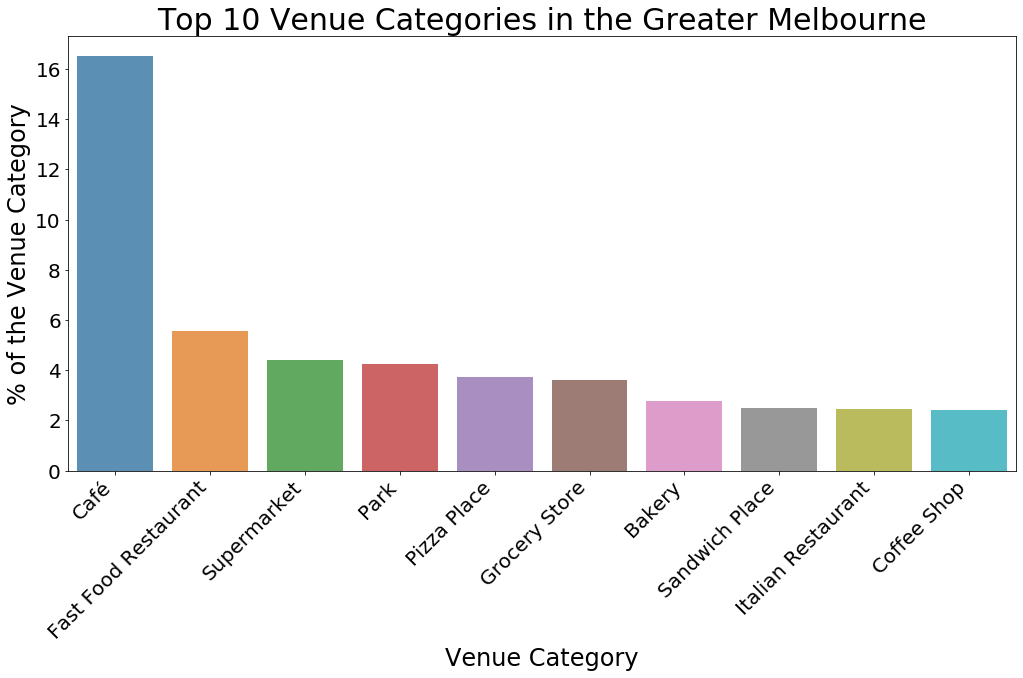

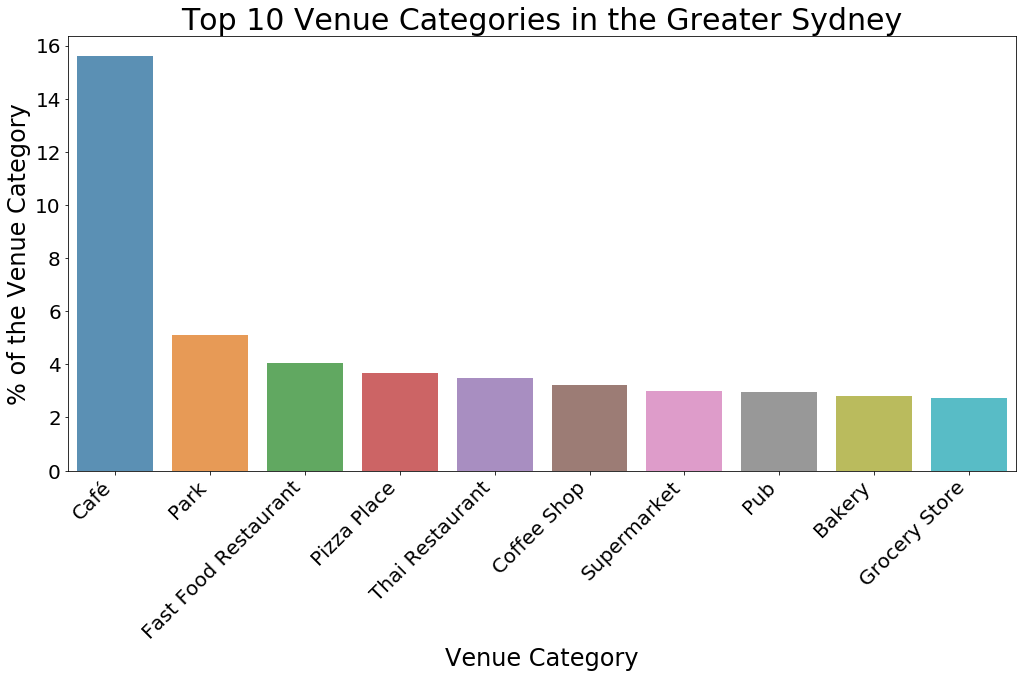

In [100]:
venues_mel=melbourne_venues['Venue Category'].value_counts()
count_mel = venues_mel[:10]
plt.figure(figsize=(17,8))
sns.barplot(count_mel.index, count_mel.values*100/(len(melbourne_venues['Venue'].unique())), alpha=0.8)
plt.title('Top 10 Venue Categories in the Greater Melbourne',fontsize=30)
plt.ylabel('% of the Venue Category', fontsize=24)
plt.xlabel('Venue Category', fontsize=24)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=20
)
plt.yticks(
    fontweight='light',
    fontsize=20
)
plt.show()
venues_syd=sydney_venues['Venue Category'].value_counts()
count_syd = venues_syd[:10]
plt.figure(figsize=(17,8))
sns.barplot(count_syd.index, count_syd.values*100/(len(sydney_venues['Venue'].unique())), alpha=0.8)
plt.title('Top 10 Venue Categories in the Greater Sydney',fontsize=30)
plt.ylabel('% of the Venue Category', fontsize=24)
plt.xlabel('Venue Category', fontsize=24)
plt.xticks(
    rotation=45, 
    horizontalalignment='right',
    fontweight='light',
    fontsize=20
)
plt.yticks(
    fontweight='light',
    fontsize=20
)
plt.show()

## Storing the information

In [111]:
df_top_10 = pd.DataFrame(columns = ["Melbourne","Count Melbourne","% Melbourne","Sydney","Count Sydney","% Sydney"])
df_top_10["Melbourne"]=venues_mel.index[:10]
df_top_10["Sydney"]=venues_syd.index[:10]
df_top_10["Count Melbourne"]=venues_mel[:10].values
df_top_10["Count Sydney"]=venues_syd[:10].values
df_top_10["% Melbourne"]=count_mel.values*100/(len(melbourne_venues['Venue'].unique()))
df_top_10["% Sydney"]=count_syd.values*100/(len(sydney_venues['Venue'].unique()))

In [3]:
df_top_10

NameError: name 'df_top_10' is not defined